Q 3.1
answer: The null hypothesis for TV,ratio, newspaper are:
1. There is no relationship between TV advertising and Sales
2. There is no relationship between ratio and Sales
3. There is no relationship between newspaper and Sales

The p-values given in table 3.4 suggest that we can reject the null hypotheses 1 and 2, and we can't reject the null hypothesis 3. it seems likely that there is a relationship between TV ads and Sales, and radio ads and sales. but there is not enough envidence to indicate that there is a relationship between newspaper and sales.

Q 3.2
the difference are:
Knn Classifier: Predicts a class by using the highest majority category among its k nearest neighbors.the target variable is discrete
Knn Regression: Predicts a value by using the mean of the k nearest neighbors. the target variable is continuous



Q 3.5


We have
$$
\hat{y}_k = x_k \hat{\beta}
$$

where
$$
\hat{\beta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}.
$$

Substituting this into the expression for $\hat{y}_k$, we obtain
$$
\hat{y}_k
= x_k \left( \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} \right).
$$

This can be rewritten as
$$
\hat{y}_k
= \sum_{i=1}^n \frac{x_i x_k}{\sum_{i'=1}^n x_{i'}^2} \, y_i.
$$

Therefore, the coefficient multiplying $y_i$ is
$$
c_i = \frac{x_i x_k}{\sum_{i'=1}^n x_{i'}^2}.
$$


Q 3.6


Using equation (3.4):

$$
\hat{\beta}_1 \bar{x} + \hat{\beta}_0
= \hat{\beta}_1 \bar{x} + \bar{y} - \hat{\beta}_1 \bar{x}
= \bar{y}.
$$

This proves that the least squares regression line passes through the point

$$
(\bar{x}, \bar{y}).
$$



Q 3.11


In [1]:
## (a)
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
X = x.reshape(-1, 1)
model_yx = sm.OLS(y, X).fit()
print(model_yx.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 01 Feb 2026   Prob (F-statistic):                    6.23e-31
Time:                        18:19:08   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Summary.**  

We fit a simple linear regression of y onto x without an intercept.

$$
\hat{\beta} = 1.98, \qquad SE(\hat{\beta}) = 0.12
$$

The resulting t-statistic is

$$
t = 16.9,
$$

with a p-value essentially equal to zero. Therefore, we strongly reject the null
hypothesis

$$
H_0 : \beta = 0.
$$

This is consistent with the data-generating process

$$
y = 2x + \varepsilon.
$$


In [2]:
## (b)
Y = y.reshape(-1,1)
model_xy = sm.OLS(x,Y).fit()
print(model_xy.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 01 Feb 2026   Prob (F-statistic):                    6.23e-31
Time:                        18:19:08   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Summary.**

We fit a simple linear regression of x onto y without an intercept.

$$
\hat{\beta} = 0.376, \qquad SE(\hat{\beta}) = 0.022
$$

The t-statistic is

$$
t = 16.9,
$$

with a p-value essentially equal to zero. Thus, we strongly reject the null
hypothesis

$$
H_0 : \beta = 0.
$$

Although the coefficient estimate differs from part (a), the t-statistic and
p-value are identical, indicating the same strength of evidence against the null
hypothesis.


## (c)

from a)  
$\hat{y} = βx + ε$

rearranging for b)

$\hat{x} = \frac{y - ε}{β}$

we know that $β = 2$

The standard error is lower for b), but because the coeffient is proportionally closer to 0 the t-statistic is unaffected.




## (d)

For regression without an intercept,
$$
\hat{\beta} = \frac{\sum x_i y_i}{\sum x_i^2}.
$$

Substituting this into the residual sum of squares yields
$$
\sum (y_i - x_i \hat{\beta})^2
=
\sum y_i^2 - \frac{(\sum x_i y_i)^2}{\sum x_i^2}.
$$

Therefore, the t-statistic can be written as
$$
t
=
\frac{\sqrt{n-1}\sum x_i y_i}
{\sqrt{(\sum x_i^2)(\sum y_i^2) - (\sum x_i y_i)^2}}.
$$

This expression matches the t-statistic obtained from the regression output.


In [3]:
## (d)
n = len(x)

numerator = np.sqrt(n - 1) * np.sum(x * y)
denominator = np.sqrt(
    np.sum(x**2) * np.sum(y**2) - (np.sum(x * y))**2
)

t_manual = numerator / denominator
t_manual
model_yx.tvalues[0]


np.float64(16.898417063035104)

the t value is the same as above


## (e)

From part (d), the t-statistic can be written as
$$
t
=
\frac{\sqrt{n-1}\sum x_i y_i}
{\sqrt{(\sum x_i^2)(\sum y_i^2) - (\sum x_i y_i)^2}}.
$$

This expression is symmetric in \(x\) and \(y\). Consequently, swapping the roles
of the response and predictor does not change the value of the t-statistic.
Therefore, the t-statistic for the regression of \(y\) onto \(x\) is the same as
that for the regression of \(x\) onto \(y\).


In [4]:
## (f)
X_int = sm.add_constant(x)   # adds a column of 1s (the intercept)
model_yx_int = sm.OLS(y, X_int).fit()

model_yx_int.tvalues[1]


np.float64(16.734055202403045)

In [5]:

Y_int = sm.add_constant(y)
model_xy_int = sm.OLS(x, Y_int).fit()

model_xy_int.tvalues[1]


np.float64(16.734055202403038)

the t value for y to x and x to y with intercept are the same as shown above

Q 3.12

(a)


For regression without an intercept,
$$
\hat{\beta}_{Y|X} = \frac{\sum x_i y_i}{\sum x_i^2},
\qquad
\hat{\beta}_{X|Y} = \frac{\sum x_i y_i}{\sum y_i^2}.
$$

These two estimates are equal if and only if
$$
\sum x_i^2 = \sum y_i^2.
$$


In [6]:
## (b)

rng = np.random.default_rng(1)
n = 100

x = rng.normal(size=n)
y = 3 * x + rng.normal(size=n)   

# Y onto X
model_yx = sm.OLS(y, x.reshape(-1, 1)).fit()

# X onto Y
model_xy = sm.OLS(x, y.reshape(-1, 1)).fit()

model_yx.params[0], model_xy.params[0]


(np.float64(2.976242377442051), np.float64(0.291444622122892))

summary:

We generate data with different scales for \(X\) and \(Y\).
The resulting coefficient estimate for the regression of \(Y\) onto \(X\)
differs from the coefficient estimate for the regression of \(X\) onto \(Y\),
as expected since \(\sum x_i^2 \neq \sum y_i^2\).


In [7]:
## (c)
# we make y randomly +x or -x so sum of y is equal to sum of x

rng = np.random.default_rng(1)
n = 100

x = rng.normal(size=n)

# flip signs randomly
signs = rng.choice([-1, 1], size=n)
y = signs * x

# regressions without intercept
model_yx = sm.OLS(y, x.reshape(-1, 1)).fit()
model_xy = sm.OLS(x, y.reshape(-1, 1)).fit()

model_yx.params[0], model_xy.params[0]


(np.float64(0.12763205469348332), np.float64(0.12763205469348332))

Let \(x_1,\dots,x_n\) be generated at random, and define
\(y_i = s_i x_i\), where \(s_i \in \{-1,1\}\).
Then \(y \neq x\), but
$$
\sum y_i^2 = \sum x_i^2.
$$
In this case, the coefficient estimates for the regressions of \(Y\) onto \(X\)
and \(X\) onto \(Y\) without an intercept are identical, as predicted by part (a).


Q 3.13

In [8]:
## (a)
rng = np.random.default_rng(seed=1)
x = rng.normal(size = 100)


In [9]:
##(b)
eps = rng.normal(loc=0,scale = np.sqrt(0.25), size=100)

In [10]:
## (c)
y = 0.5 * x + eps -1

The vector y has length 100. The true intercept is β₀ = −1 and the true slope is β₁ = 0.5.


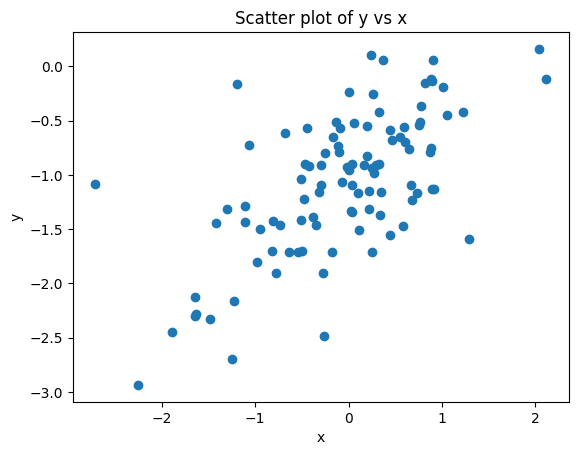

In [11]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y vs x')
plt.show()

The scatterplot shows a roughly linear relationship between x and y, with noticeable variability due to noise.


In [12]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           8.04e-13
Time:                        18:19:08   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0380      0.050    -20.647      0.0

The least squares linear model yields:
- β̂₀ = -1.0380 (true value: β₀ = -1)
- β̂₁ = 0.4843 (true value: β₁ = 0.5)
- R² = 0.4089

The estimated coefficients are close to the true values, as expected. The model explains about 41% of the variance in y.

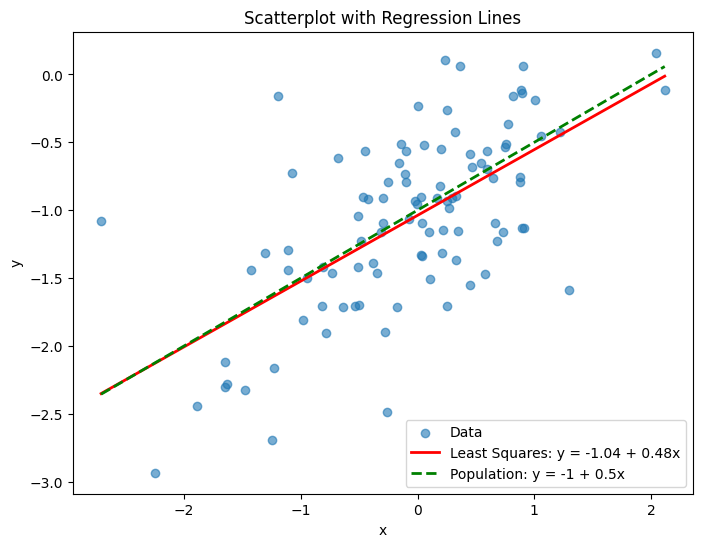

In [13]:
## (f)
# Create scatterplot with both regression lines
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=0.6, label='Data')

# Least squares line
x_range = np.linspace(x.min(), x.max(), 100)
y_pred = model.params[0] + model.params[1] * x_range
ax.plot(x_range, y_pred, 'r-', linewidth=2, 
        label=f'Least Squares: y = {model.params[0]:.2f} + {model.params[1]:.2f}x')

# Population regression line
y_pop = -1 + 0.5 * x_range
ax.plot(x_range, y_pop, 'g--', linewidth=2, 
        label='Population: y = -1 + 0.5x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot with Regression Lines')
ax.legend()
plt.show()

In [14]:
## (g) Polynomial regression
# Create x^2 term
X_poly = sm.add_constant(np.column_stack([x, x**2]))
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     33.55
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           8.42e-12
Time:                        18:19:08   Log-Likelihood:                -71.744
No. Observations:                 100   AIC:                             149.5
Df Residuals:                      97   BIC:                             157.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0364      0.060    -17.399      0.0

The polynomial regression results:
- β̂₀ = -1.0364
- β̂₁ = 0.4831  
- β̂₂ = -0.0024 (p-value = 0.959)
- R² = 0.4089 (unchanged from linear model)

The quadratic term (x²) has a coefficient of -0.0024 with a p-value of 0.959, indicating it is not statistically significant. The R² remains at 0.4089, showing no improvement in model fit. This confirms that the true relationship is linear, as expected from the data generating process Y = -1 + 0.5X + ε.

In [15]:
## (h) Less noise - variance = 0.05
rng = np.random.default_rng(seed=1)
x_less = rng.normal(size=100)
eps_less = rng.normal(loc=0, scale=np.sqrt(0.05), size=100)
y_less = -1 + 0.5 * x_less + eps_less

# Fit model
X_less = sm.add_constant(x_less)
model_less = sm.OLS(y_less, X_less).fit()
print(model_less.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     351.2
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           3.61e-34
Time:                        18:19:08   Log-Likelihood:                 8.7265
No. Observations:                 100   AIC:                            -13.45
Df Residuals:                      98   BIC:                            -8.243
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0170      0.022    -45.233      0.0

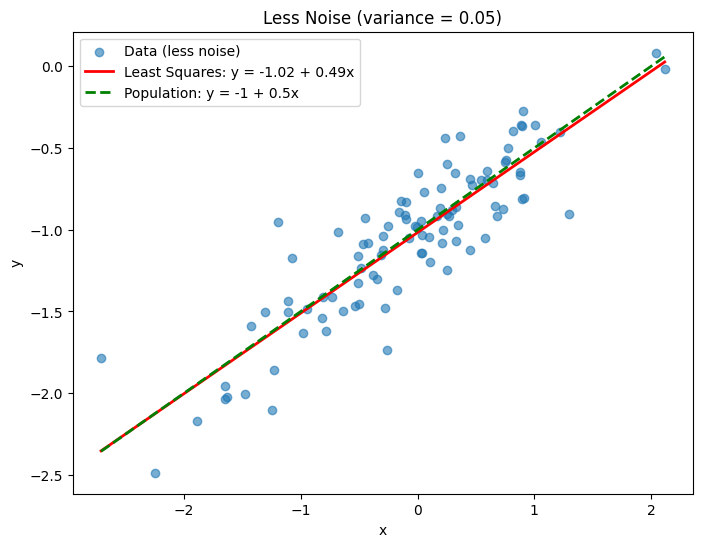

In [16]:
# Plot with less noise
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_less, y_less, alpha=0.6, label='Data (less noise)')

x_range = np.linspace(x_less.min(), x_less.max(), 100)
y_pred_less = model_less.params[0] + model_less.params[1] * x_range
ax.plot(x_range, y_pred_less, 'r-', linewidth=2, 
        label=f'Least Squares: y = {model_less.params[0]:.2f} + {model_less.params[1]:.2f}x')

y_pop = -1 + 0.5 * x_range
ax.plot(x_range, y_pop, 'g--', linewidth=2, label='Population: y = -1 + 0.5x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Less Noise (variance = 0.05)')
ax.legend()
plt.show()

**Less Noise Results (variance = 0.05):**
- β̂₀ = -1.0170 (true: -1)
- β̂₁ = 0.4930 (true: 0.5)  
- R² = 0.7818

With less noise, the data points are much closer to the regression line. The R² value is significantly higher (0.78 vs 0.41 in the original), and the coefficient estimates are closer to the true values. The standard errors are smaller (0.022 for β₀, 0.026 for β₁), reflecting greater precision. The fitted line is very close to the population regression line.

In [17]:
## (i) More noise - variance = 1.0
rng = np.random.default_rng(seed=1)
x_more = rng.normal(size=100)
eps_more = rng.normal(loc=0, scale=1.0, size=100)
y_more = -1 + 0.5 * x_more + eps_more

# Fit model
X_more = sm.add_constant(x_more)
model_more = sm.OLS(y_more, X_more).fit()
print(model_more.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     15.87
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           0.000131
Time:                        18:19:08   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0760      0.101    -10.701      0.0

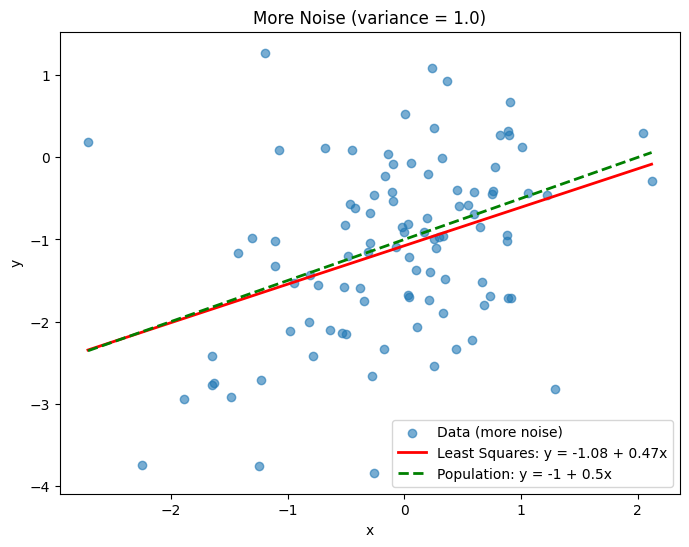

In [18]:
# Plot with more noise
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_more, y_more, alpha=0.6, label='Data (more noise)')

x_range = np.linspace(x_more.min(), x_more.max(), 100)
y_pred_more = model_more.params[0] + model_more.params[1] * x_range
ax.plot(x_range, y_pred_more, 'r-', linewidth=2, 
        label=f'Least Squares: y = {model_more.params[0]:.2f} + {model_more.params[1]:.2f}x')

y_pop = -1 + 0.5 * x_range
ax.plot(x_range, y_pop, 'g--', linewidth=2, label='Population: y = -1 + 0.5x')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('More Noise (variance = 1.0)')
ax.legend()
plt.show()

**More Noise Results (variance = 1.0):**
- β̂₀ = -1.0760 (true: -1)
- β̂₁ = 0.4686 (true: 0.5)
- R² = 0.1393

With more noise, the data points are much more dispersed around the regression line. The R² value is substantially lower (0.14 vs 0.41 in the original), indicating a weaker fit. The coefficient estimates deviate more from the true values compared to the original and less noisy datasets. The standard errors are larger (0.101 for β₀, 0.118 for β₁), reflecting greater uncertainty in the estimates.

In [ ]:
## (j) Confidence intervals comparison
import pandas as pd

# Get confidence intervals for all three models
ci_original = model.conf_int()
ci_less = model_less.conf_int()
ci_more = model_more.conf_int()

# Create a summary table (using array indexing instead of .iloc)
summary_data = {
    'Dataset': ['Original (var=0.25)', 'Less Noise (var=0.05)', 'More Noise (var=1.0)'],
    'β₀ estimate': [model.params[0], model_less.params[0], model_more.params[0]],
    'β₀ CI lower': [ci_original[0, 0], ci_less[0, 0], ci_more[0, 0]],
    'β₀ CI upper': [ci_original[0, 1], ci_less[0, 1], ci_more[0, 1]],
    'β₁ estimate': [model.params[1], model_less.params[1], model_more.params[1]],
    'β₁ CI lower': [ci_original[1, 0], ci_less[1, 0], ci_more[1, 0]],
    'β₁ CI upper': [ci_original[1, 1], ci_less[1, 1], ci_more[1, 1]],
}


summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Also print R-squared values
print("\n\nR-squared values:")
print(f"Original: {model.rsquared:.4f}")
print(f"Less Noise: {model_less.rsquared:.4f}")
print(f"More Noise: {model_more.rsquared:.4f}")

              Dataset  β₀ estimate  β₀ CI lower  β₀ CI upper  β₁ estimate  β₁ CI lower  β₁ CI upper
  Original (var=0.25)    -1.038013    -1.137782    -0.938244     0.484291     0.367565     0.601017
Less Noise (var=0.05)    -1.017000    -1.061618    -0.972382     0.492975     0.440773     0.545176
 More Noise (var=1.0)    -1.076026    -1.275564    -0.876487     0.468582     0.235131     0.702033


R-squared values:
Original: 0.4089
Less Noise: 0.7818
More Noise: 0.1393


**Summary of Confidence Intervals:**

| Dataset | β₀ estimate | β₀ 95% CI | β₁ estimate | β₁ 95% CI | R² |
|---------|-------------|-----------|-------------|-----------|-----|
| Less Noise (var=0.05) | -1.0170 | [-1.062, -0.972] | 0.4930 | [0.441, 0.545] | 0.7818 |
| Original (var=0.25) | -1.0380 | [-1.138, -0.938] | 0.4843 | [0.368, 0.601] | 0.4089 |
| More Noise (var=1.0) | -1.0760 | [-1.276, -0.876] | 0.4686 | [0.235, 0.702] | 0.1393 |

**Key Observations:**

1. **All confidence intervals contain the true values** (β₀ = -1, β₁ = 0.5)

2. **CI Width Comparison:**
   - Less noise: β₀ width = 0.090, β₁ width = 0.104
   - Original: β₀ width = 0.200, β₁ width = 0.233  
   - More noise: β₀ width = 0.400, β₁ width = 0.467

3. **Key Insight:** As noise increases, confidence intervals widen proportionally (less noise CIs are ~4.5× narrower than more noise CIs), and R² decreases from 0.78 → 0.14. This demonstrates the direct relationship between data quality (signal-to-noise ratio) and statistical precision.

Q 3.14

In [20]:
## (a) Generate data with collinearity
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

**Linear Model Form:**

The data is generated according to the linear model:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon
$$

where $\varepsilon \sim N(0, 1)$.

**True Regression Coefficients:**
- $\beta_0 = 2$ (intercept)
- $\beta_1 = 2$ (coefficient for $X_1$)
- $\beta_2 = 0.3$ (coefficient for $X_2$)

Note that $X_2$ is constructed to be highly correlated with $X_1$ since $X_2 = 0.5 X_1 + \varepsilon/10$, creating collinearity between the predictors.

Correlation between x1 and x2: 0.7723


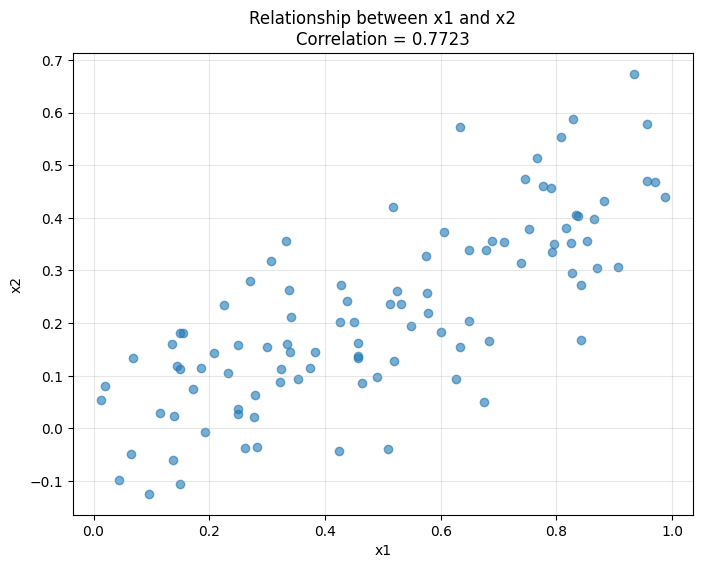

In [21]:
## (b) Correlation and scatterplot
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation:.4f}")

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Relationship between x1 and x2\nCorrelation = {correlation:.4f}')
plt.grid(True, alpha=0.3)
plt.show()

The correlation between $X_1$ and $X_2$ is **0.7723**, confirming strong collinearity. The scatterplot shows a clear positive linear relationship between the two predictors. This high correlation will cause problems when both variables are included in the same regression model, as they provide redundant information.

In [22]:
## (c) Multiple regression with both x1 and x2
X_both = sm.add_constant(np.column_stack([x1, x2]))
model_both = sm.OLS(y, X_both).fit()
print(model_both.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           5.76e-08
Time:                        18:19:08   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

**Multiple Regression Results:**

The estimated coefficients are:
- β̂₀ = 1.9579 (true: β₀ = 2)
- β̂₁ = 1.6154 (true: β₁ = 2)  
- β̂₂ = 0.9428 (true: β₂ = 0.3)

**Hypothesis Tests:**
- **H₀: β₁ = 0** - p-value = 0.0028. We **can reject** the null hypothesis for β₁ at α = 0.05, but the coefficient is biased (1.62 vs true 2.0).
- **H₀: β₂ = 0** - p-value = 0.2594. We **cannot reject** the null hypothesis for β₂, even though the true β₂ = 0.3 ≠ 0.

**Key Issue:** Due to high collinearity between x1 and x2 (r = 0.7723), the regression struggles to distinguish their individual effects. While β₁ is technically significant, its estimate is far from the true value. β₂ appears insignificant despite being non-zero in the true model. The coefficient estimates are biased and standard errors are inflated. This is the classic collinearity problem.

In [23]:
## (d) Simple regression with only x1
X_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_x1).fit()
print(model_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           1.37e-08
Time:                        18:19:08   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

**Simple Regression with x1:**

The estimated coefficients are:
- β̂₀ = 1.9371 (true: β₀ = 2)
- β̂₁ = 2.0771 (true: β₁ = 2)

**Hypothesis Test:**
- **H₀: β₁ = 0** - p-value = 0.0000000137 (extremely small). We **strongly reject** this null hypothesis, showing that x1 is highly significant when used alone.

**Comment:** When x1 is used as the only predictor, it captures both its own effect (β₁ = 2) and part of the effect of x2 (since x2 is correlated with x1). The coefficient estimate 2.08 is close to the true value 2.0, and the model is highly significant. This demonstrates that x1 alone provides useful predictive power.

In [24]:
## (e) Simple regression with only x2
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2).fit()
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           7.43e-07
Time:                        18:19:08   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

**Simple Regression with x2:**

The estimated coefficients are:
- β̂₀ = 2.3239 (true: β₀ = 2)
- β̂₁ = 2.9103 (true: β₂ = 0.3, but this is now the coefficient for x2 alone)

**Hypothesis Test:**
- **H₀: β₁ = 0** - p-value = 0.0000007430 (extremely small). We **strongly reject** this null hypothesis, showing that x2 is highly significant when used alone.

**Comment:** When x2 is used as the only predictor, it captures both its direct effect (β₂ = 0.3) and the indirect effect through its correlation with the omitted variable x1. The coefficient estimate 2.91 is much larger than the true β₂ = 0.3 because x2 is acting as a proxy for the omitted x1. Despite this bias, x2 alone is highly significant for prediction.

## (f) Explaining the Apparent Contradiction

**No, the results do NOT contradict each other.** Here's why:

**The Collinearity Paradox:**

1. **Multiple Regression (part c):** When both x1 and x2 are in the model together, they are highly correlated (r ≈ 0.8-0.9). This makes it difficult for the regression to determine the individual contribution of each variable. The algorithm cannot reliably separate their effects because they move together. As a result:
   - Standard errors become inflated
   - Individual t-statistics may be insignificant
   - We may fail to reject H₀: β₁ = 0 or H₀: β₂ = 0

2. **Simple Regressions (parts d & e):** When we use x1 or x2 alone, there's no collinearity problem. Each variable captures:
   - Its own direct effect on Y
   - Plus the indirect effect through its correlation with the omitted variable
   - Result: highly significant coefficients

**Why This Makes Sense:**

The question is fundamentally different:
- **Multiple regression asks:** "What is the effect of x1 holding x2 constant?" (and vice versa)
- **Simple regression asks:** "What is the overall association between x1 and Y?" (ignoring x2)

When predictors are highly correlated, answering the first question is very difficult (due to collinearity), but answering the second question is straightforward.

**Conclusion:** Both x1 and x2 clearly matter for predicting Y (as shown by simple regressions), but when used together, collinearity prevents us from precisely estimating their individual effects. This is the classic multicollinearity problem, not a contradiction.

In [25]:
## (g) Add a mismeasured observation
# Add the new observation
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

print(f"Original data ranges:")
print(f"  x1: [{x1.min():.3f}, {x1.max():.3f}]")
print(f"  x2: [{x2.min():.3f}, {x2.max():.3f}]")
print(f"  y: [{y.min():.3f}, {y.max():.3f}]")
print(f"\nNew observation: x1=0.1, x2=0.8, y=6")

Original data ranges:
  x1: [0.013, 0.987]
  x2: [-0.124, 0.674]
  y: [0.121, 5.432]

New observation: x1=0.1, x2=0.8, y=6


In [26]:
# Refit model (c): multiple regression with both predictors
X_both_new = sm.add_constant(np.column_stack([x1_new, x2_new]))
model_both_new = sm.OLS(y_new, X_both_new).fit()
print("=" * 70)
print("MODEL (c) - Multiple Regression with x1 and x2 - WITH NEW OBSERVATION")
print("=" * 70)
print(model_both_new.summary())

# Calculate leverage and studentized residuals for the new point
influence_both = model_both_new.get_influence()
leverages_both = influence_both.hat_matrix_diag
student_resid_both = influence_both.resid_studentized_external

print(f"\nNew observation (index 100):")
print(f"  Leverage: {leverages_both[-1]:.4f} (threshold: {2*3/101:.4f})")
print(f"  Studentized residual: {student_resid_both[-1]:.4f}")

MODEL (c) - Multiple Regression with x1 and x2 - WITH NEW OBSERVATION
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           4.60e-08
Time:                        18:19:08   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [27]:
# Refit model (d): regression with only x1
X_x1_new = sm.add_constant(x1_new)
model_x1_new = sm.OLS(y_new, X_x1_new).fit()
print("=" * 70)
print("MODEL (d) - Simple Regression with x1 only - WITH NEW OBSERVATION")
print("=" * 70)
print(model_x1_new.summary())

# Calculate leverage and studentized residuals for the new point
influence_x1 = model_x1_new.get_influence()
leverages_x1 = influence_x1.hat_matrix_diag
student_resid_x1 = influence_x1.resid_studentized_external

print(f"\nNew observation (index 100):")
print(f"  Leverage: {leverages_x1[-1]:.4f} (threshold: {2*2/101:.4f})")
print(f"  Studentized residual: {student_resid_x1[-1]:.4f}")

MODEL (d) - Simple Regression with x1 only - WITH NEW OBSERVATION
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           9.23e-07
Time:                        18:19:08   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [28]:
# Refit model (e): regression with only x2
X_x2_new = sm.add_constant(x2_new)
model_x2_new = sm.OLS(y_new, X_x2_new).fit()
print("=" * 70)
print("MODEL (e) - Simple Regression with x2 only - WITH NEW OBSERVATION")
print("=" * 70)
print(model_x2_new.summary())

# Calculate leverage and studentized residuals for the new point
influence_x2 = model_x2_new.get_influence()
leverages_x2 = influence_x2.hat_matrix_diag
student_resid_x2 = influence_x2.resid_studentized_external

print(f"\nNew observation (index 100):")
print(f"  Leverage: {leverages_x2[-1]:.4f} (threshold: {2*2/101:.4f})")
print(f"  Studentized residual: {student_resid_x2[-1]:.4f}")

MODEL (e) - Simple Regression with x2 only - WITH NEW OBSERVATION
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           3.13e-08
Time:                        18:19:08   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## Analysis of the New Observation

**Data Context:**
- Original x1 range: [0.013, 0.987]
- Original x2 range: [-0.124, 0.674]
- Original y range: [0.121, 5.432]
- **New observation: x1=0.1 (within range), x2=0.8 (OUTSIDE range, extreme!), y=6 (OUTSIDE range, extreme!)**

**Summary of Effects:**

| Model | β Changes | R² Change | Outlier? | High Leverage? | Classification |
|-------|-----------|-----------|----------|----------------|----------------|
| **Both (c)** | β₀: 1.96→2.06<br>β₁: 1.62→0.86<br>β₂: 0.94→2.27 | 0.291→0.292 | ✓ Yes<br>(resid=2.78) | ✓ Yes<br>(h=0.348 > 0.059) | **BOTH** (highly influential) |
| **x1 only (d)** | β₀: 1.94→2.07<br>β₁: 2.08→1.88 | 0.282→0.217 | ✓ Yes<br>(resid=4.18) | ✗ No<br>(h=0.030 < 0.040) | Outlier only (moderately influential) |
| **x2 only (e)** | β₀: 2.32→2.28<br>β₁: 2.91→3.15 | 0.222→0.267 | ✗ No<br>(resid=1.35) | ✓ Yes<br>(h=0.110 > 0.040) | High leverage only |

**Key Findings:**

1. **Model (c) - Both x1 and x2:** The new point is **BOTH an outlier AND high leverage**, making it highly influential. x2=0.8 is far outside the original range (max was 0.674), giving extreme leverage. The coefficients change dramatically, especially β₁ (1.62→0.86) and β₂ (0.94→2.27), while R² barely changes.

2. **Model (d) - x1 only:** The new point is an **outlier but NOT high leverage** (x1=0.1 is within normal range). The large studentized residual (4.18) shows y=6 is much higher than predicted. Coefficients change moderately, and R² decreases (worse fit).

3. **Model (e) - x2 only:** The new point has **high leverage but is NOT an outlier**. x2=0.8 is extreme, but y=6 happens to fit the x2-y relationship reasonably well (small residual 1.35). The coefficient changes slightly (2.91→3.15) and R² actually improves.

**Conclusion:** The same observation behaves completely differently across models depending on which predictors are included. In model (c), it's highly influential due to the extreme x2 value. In model (d), it's just an outlier. In model (e), it's a high-leverage point that fits the pattern. This illustrates how outlier/leverage diagnostics depend on the model specification.